In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Introduction to Matplotlib
### Basic Graph

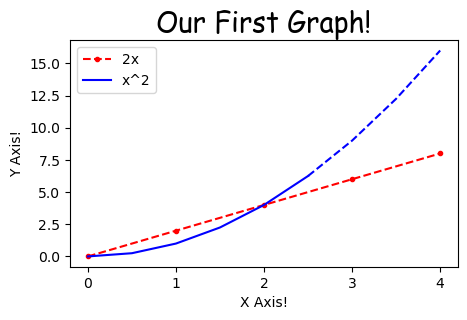

In [47]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

#Resize the graph (dpi specifies pixels per inch. When saving propably should use 300 if possible)
plt.figure(figsize=(5,3), dpi=100)

#Line 1:
#color = can assign color name or using hex 

#Keyword Argument Notation
#plt.plot(x,y, label='2x', color='purple', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='red')

#Use shorthand notation
#fmt = '[color][marker][line]'
plt.plot(x,y, 'r.--', label='2x')

## Line 2:

#select interval we want to place points at
x2 = np.arange(0,4.5,0.5)

#Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'b', label='x^2')

#Plot part of the graph as --
plt.plot(x2[5:], x2[5:]**2, 'b--')

#Add title (specify font parameter with fontdict)
plt.title("Our First Graph!", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

#X and Y labels
plt.xlabel("X Axis!")
plt.ylabel("Y Axis!")

#X axis tickmarks (scale of the graph)
plt.xticks([0,1,2,3,4])

#Add a legend
plt.legend()

#Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

#Show plot
plt.show()

### Bar Chart

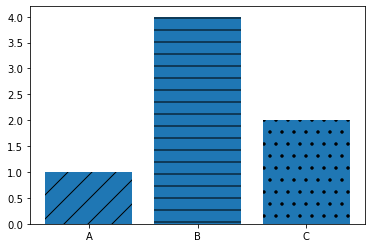

<Figure size 432x288 with 0 Axes>

In [53]:
labels = ['A', 'B', 'C']
values = [1,4,2]

bars = plt.bar(labels, values)

#Easy and neater way to set the patterns
patterns = ['/', '-', '.']
for bar in bars:
    bar.set_hatch(patterns.pop(0)) #.pop(0) is start with the first pattern
    
#bars[0].set_hatch('/')
#bars[1].set_hatch('o')
#bars[2].set_hatch('.')

plt.figure(figsize=(6,4))
      
plt.show()

## Real World Examples
### Line Graph

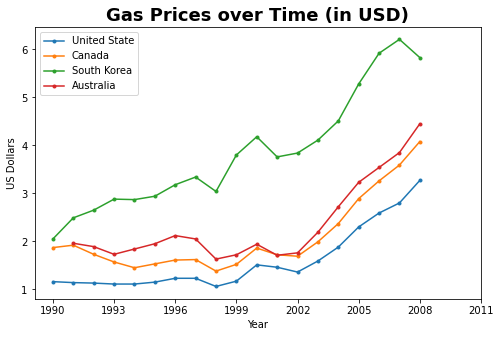

In [101]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.plot(gas.Year, gas.USA, '.-', label='United State')
plt.plot(gas.Year, gas.Canada, '.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'], '.-', label='South Korea')
plt.plot(gas.Year, gas.Australia, '.-', label='Australia')

plt.xticks(gas.Year[::3].tolist()+[2011])

#Another way to plot many values
#countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
#for country in gas:
#    if country in countries_to_look_at:
#        plt.plot(gas.Year, gas[country], marker='.')

plt.legend()
plt.savefig('Gas_price_figure.png', dpi=300)
plt.show()

### Histogram

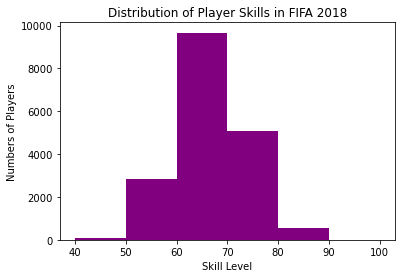

In [111]:
fifa = pd.read_csv('fifa_data.csv')

bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='purple')
plt.xticks(bins)

plt.title('Distribution of Player Skills in FIFA 2018')
plt.xlabel('Skill Level')
plt.ylabel('Numbers of Players')

plt.show()



### Pie Chart 1

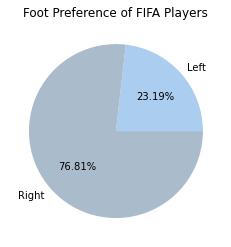

In [126]:
fifa = pd.read_csv('fifa_data.csv')

left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left,right], labels=labels, colors=colors,autopct='%.2f%%')

plt.title('Foot Preference of FIFA Players')

plt.show()

### Pie Chart 2

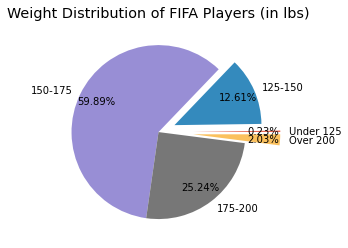

In [138]:
fifa = pd.read_csv('fifa_data.csv')

fifa.Weight = [int(x.strip('lbs')) if type(x)== str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight Distribution of FIFA Players (in lbs)')
plt.pie(weights, labels=labels, autopct='%.2f%%', pctdistance=0.8, explode=explode)

plt.show()

### Box and Whiskers Chart

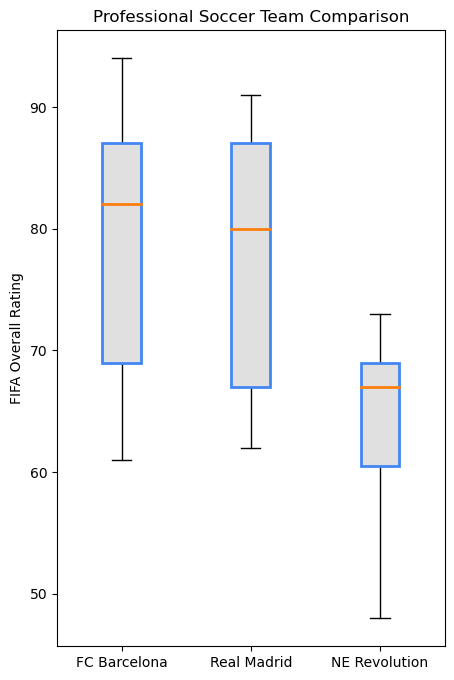

In [156]:
fifa = pd.read_csv('fifa_data.csv')

plt.style.use('default')
plt.figure(figsize=(5,8))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
labels = ['FC Barcelona', 'Real Madrid', 'NE Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth': 2})

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

for box in boxes['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor='#e0e0e0')
    # change hatch
    #box.set(hatch = '/')



plt.show()
